[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 0, Loss: 2.3020
Test Accuracy: 0.3452
Epoch 10, Loss: 1.6161
Test Accuracy: 0.5090
Epoch 20, Loss: 1.1391
Test Accuracy: 0.6014
Epoch 30, Loss: 0.9295
Test Accuracy: 0.6558
Epoch 40, Loss: 0.8156
Test Accuracy: 0.6974
Epoch 50, Loss: 0.7634
Test Accuracy: 0.7162
Epoch 60, Loss: 0.7980
Test Accuracy: 0.6954
Epoch 70, Loss: 0.6855
Test Accuracy: 0.7270
Epoch 80, Loss: 0.6670
Test Accuracy: 0.7339
Epoch 90, Loss: 0.6395
Test Accuracy: 0.7435
Epoch 100, Loss: 0.6494
Test Accuracy: 0.7249
Epoch 110, Loss: 0.6180
Test Accuracy: 0.7455
Epoch 120, Loss: 0.5806
Test Accuracy: 0.7752
Epoch 130, Loss: 0.5803
Test Accuracy: 0.7710
Epoch 140, Loss: 0.5664
Test Accuracy: 0.7713
Epoch 150, Loss: 0.5602
Test Accuracy: 0.7738
Epoch 160, Loss: 0.5322
Test Accuracy: 0.7922
Epoch 170, Loss: 0.5593
Test Accuracy: 0.7814
Epoch 180, Loss: 0.5287
Tes

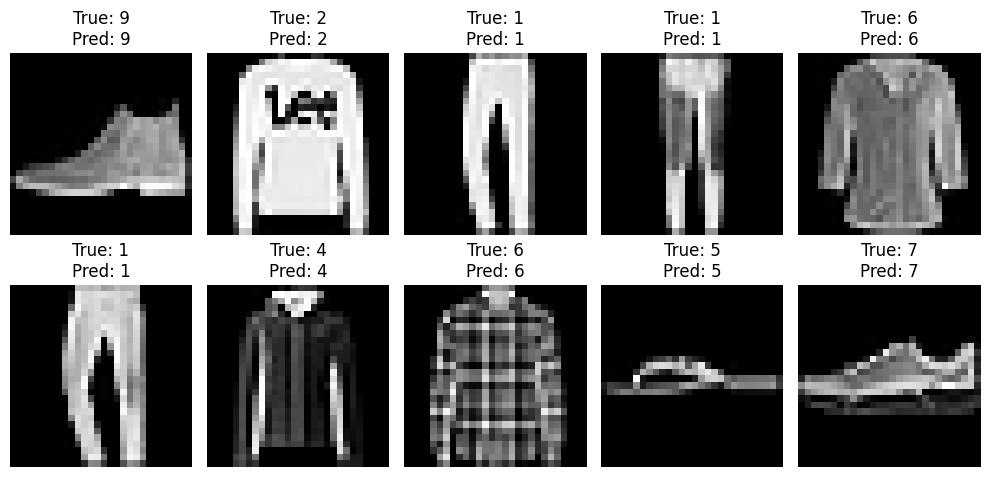

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #Load data from dataset

np.random.seed(34) #set seed for predictable testing of model's performance
assert x_train.shape == (60000, 28, 28) #check if the dataset contains exactly
assert x_test.shape == (10000, 28, 28)  # what you need
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train=x_train.reshape(x_train.shape[0], -1) / 255
x_test=x_test.reshape(x_test.shape[0], -1) / 255
print(x_train)

def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, l1_lambda=0.0, l2_lambda=0.0):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m

        # L1 regularization
        dW1 += self.l1_lambda * np.sign(self.W1)
        dW2 += self.l1_lambda * np.sign(self.W2)

        # L2 regularization
        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 10 == 0:
                loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
                predictions = nn.predict(x_test)
                accuracy = np.mean(predictions == y_test)
                print(f"Test Accuracy: {accuracy:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


input_size = 784
hidden_size = 64
output_size = 10
learning_rate = 0.4
epochs = 10000
l1_lambda=1
l2_lambda=1.5

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

nn.train(x_train, y_train_encoded, epochs)

predictions = nn.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(x_test, y_test, predictions)